In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

import random

# Loading Dataset

In [ ]:
dataset_cifar = tf.keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = dataset_cifar

# remember to put brackets

# Pre-processing Data

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
#normalization to small range ("-1 to 1" OR "0 to 1") increases model reliability

[]

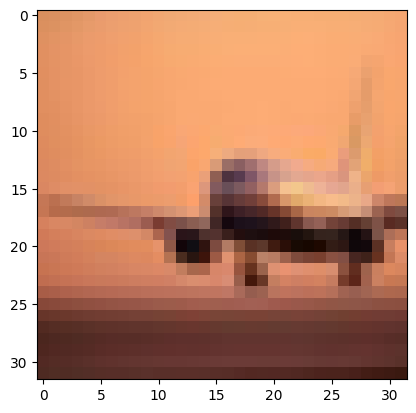

In [ ]:
plt.imshow(random.choice(X_train))
plt.plot()

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

# each tuple [] denotes a number
# eg- first element, is represented by (0,0,0,0,0,0, 1,0,0,0)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Defining Network


In [ ]:
model = Sequential([                                        # We define layers, separating each layer using comma
    Input(shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])),    # X_train.shape = (50,000, 32, 32, 3)
    Flatten(),                                              # converted from 32x32x3 to 3072x1 (1 dimensional), as dense layers in NNs need 1D stuff
    Dense(128, activation = 'relu'),                        # relu helps catch non-linearity
    #Dropout(0.2),                                           # sets random 20% weights to 0, to prevent overfitting
    Dense(64, activation = 'relu'),                         # halving the number of neurons
    Dropout(0.2),
    Dense(10, activation = 'softmax'),                      # converts into set of probabilities
])

# Training Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# adam is robust
# stochastic gradient descent, loss func for one-hot encoding (diff between predicted probabilities and one-hot encoded labels)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=11, validation_data=(X_test, y_test))

#epochs is the number of complete iterations on the dataset.

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2099 - loss: 2.1195 - val_accuracy: 0.3188 - val_loss: 1.8689
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2854 - loss: 1.9336 - val_accuracy: 0.3200 - val_loss: 1.8593
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2958 - loss: 1.9004 - val_accuracy: 0.3485 - val_loss: 1.8115
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3025 - loss: 1.8947 - val_accuracy: 0.3477 - val_loss: 1.8189
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3116 - loss: 1.8727 - val_accuracy: 0.3561 - val_loss: 1.8134
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3189 - loss: 1.8628 - val_accuracy: 0.3707 - val_loss: 1.7698
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3192 - loss: 1.8609 - val_accuracy: 0.3518 - val_loss: 1.7799
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3201 - loss: 1

# Plotting Loss and Accuracy

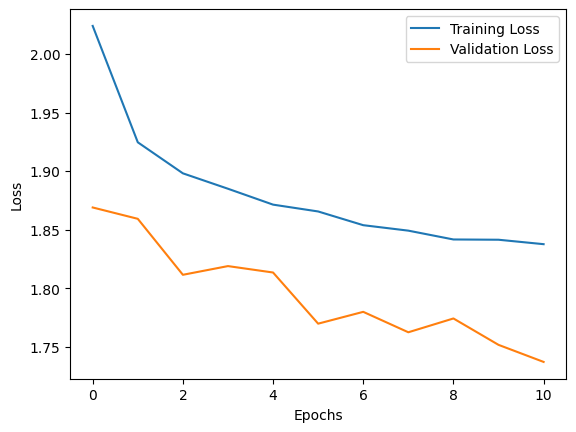

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

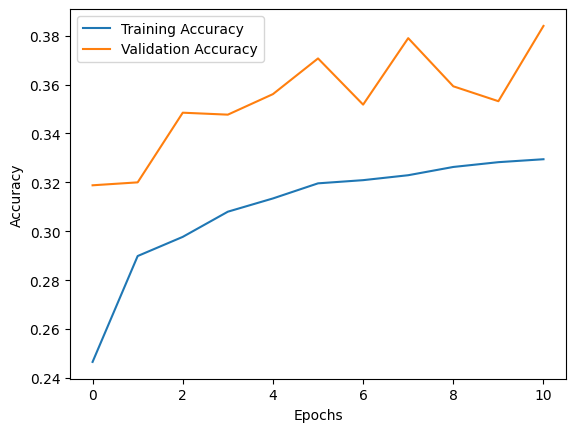

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3848 - loss: 1.7363


# Predictions

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Actual label:- 6
Predicted label:- 6


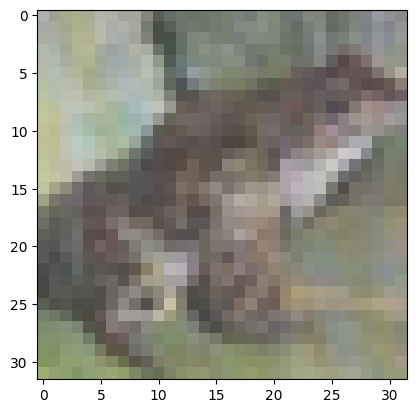

In [ ]:
plt.imshow(X_test[140])

print("Actual label:-", np.argmax(y_test[140]))
print("Predicted label:-", np.argmax(y_pred[140]))

# np.argmax returns highest probability wala